In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
data = pd.read_csv("/content/pca_iris.data")
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
#yukarida sütün isimlerinde bi eskiklik-hata olustugu icin gelin bunu tekrar düzenleyelim
data.columns = ['sepal length','sepal width','petal length','petal width','target']

data 

,sepal length,sepal width,petal length,petal width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [42]:
X= data.drop(["target"],axis=1)#target disindaki bütün columnslar X degiskenidir
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [43]:
y=data[["target"]]
y.columns

Index(['target'], dtype='object')

In [44]:
# Boyutlar cok farkli degerlerde olduklari icin bunlari dengelemek lazim.
#bunun icin Standartscaler> mean:0 varyans=1 olacak sekilde degistiriyoruz
X = StandardScaler().fit_transform(X)

In [48]:
X[0:10]#Scaler edildikten sonraki halleri

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301]])

In [49]:
pca = PCA(n_components=2)
P_C_A = pca.fit_transform(X)
pca_Dat= pd.DataFrame(data= P_C_A ,columns=["p component 1","p component 2"])

In [50]:
pca_Dat

,p component 1,p component 2
0,-2.107950,-0.644276
1,-2.387971,-0.305833
2,-2.324879,-0.562923
3,-2.405086,0.687591
4,-2.083204,1.530252
...,...,...
144,1.859771,0.379344
145,1.542004,-0.908086
146,1.509255,0.264606
147,1.369096,1.015839


In [54]:
final_data = pd.concat([pca_Dat, y], axis=1)
final_data # cok boyutlu bir veriyi biraz kayip karsiliginda az boyutla temsil etmek 

,p component 1,p component 2,target
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa
...,...,...,...
144,1.859771,0.379344,Iris-virginica
145,1.542004,-0.908086,Iris-virginica
146,1.509255,0.264606,Iris-virginica
147,1.369096,1.015839,Iris-virginica


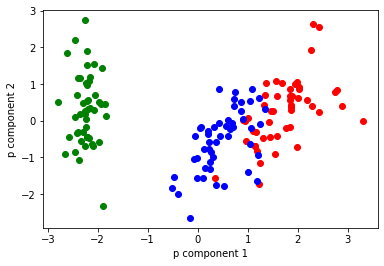

In [56]:
dfsetosa= final_data[data.target=='Iris-setosa']
dfvirginica = final_data[data.target=='Iris-virginica']
dfversicolor = final_data[data.target=='Iris-versicolor']
plt.xlabel('p component 1')
plt.ylabel('p component 2')

plt.scatter(dfsetosa['p component 1'], dfsetosa['p component 2'],color='green')
plt.scatter(dfvirginica['p component 1'], dfvirginica['p component 2'],color='red')
plt.scatter(dfversicolor['p component 1'], dfversicolor['p component 2'],color='blue')


In [57]:
pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [58]:
pca.explained_variance_ratio_.sum()

0.9576744018556446